In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # adding bias
        X = np.insert(X, 0, 1, axis=1)
        
        # calculating weights by OLS
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        print(self.weights)

    def predict(self, X):
        # adding bias
        X = np.insert(X, 0, 1, axis=1)
        
        # predicting
        y_pred = X.dot(self.weights)
        return y_pred

    def score(self, X, y):
        # MSE
        y_pred = self.predict(X)
        mse = np.mean((y_pred - y) ** 2)
        return mse

In [3]:
# read and preprocess

diamond = pd.read_csv('diamond.csv')
def understand_data(diamond) :
    return(pd.DataFrame({"Datatype":diamond.dtypes,
                         "No of NAs":diamond.isna().sum(),
                         "No of Levels":diamond.apply(lambda x: x.nunique(),axis=0),
                         "Levels":diamond.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(diamond)




,Datatype,No of NAs,No of Levels,Levels
Unnamed: 0,int64,0,53940,[ 1 2 3 ... 53938 53939 53940]
carat,float64,0,273,[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3 0.2 ...
cut,object,0,5,['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color,object,0,7,['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity,object,0,8,['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
depth,float64,0,184,[61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 ...
table,float64,0,127,[55. 61. 65. 58. 57. 56. 54. 62. 59. ...
price,int64,0,11602,[ 326 327 334 ... 2753 2755 2756]
x,float64,0,554,[ 3.95 3.89 4.05 4.2 4.34 3.94 4.07 3....
y,float64,0,552,[ 3.98 3.84 4.07 4.23 4.35 3.96 4.11 3....


In [4]:

diamond.drop(columns=['Unnamed: 0'], inplace=True)

diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.shape

(53940, 10)

In [6]:
print(diamond.describe())
def understand_data(diamond) :
    return(pd.DataFrame({"Datatype":diamond.dtypes,
                         "No of NAs":diamond.isna().sum(),
                         "No of Levels":diamond.apply(lambda x: x.nunique(),axis=0),
                         "Levels":diamond.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(diamond)

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


,Datatype,No of NAs,No of Levels,Levels
carat,float64,0,273,[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3 0.2 ...
cut,object,0,5,['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color,object,0,7,['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity,object,0,8,['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
depth,float64,0,184,[61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 ...
table,float64,0,127,[55. 61. 65. 58. 57. 56. 54. 62. 59. ...
price,int64,0,11602,[ 326 327 334 ... 2753 2755 2756]
x,float64,0,554,[ 3.95 3.89 4.05 4.2 4.34 3.94 4.07 3....
y,float64,0,552,[ 3.98 3.84 4.07 4.23 4.35 3.96 4.11 3....
z,float64,0,375,[ 2.43 2.31 2.63 2.75 2.48 2.47 2.53 2....


/var/folders/7w/045vs4v176nck45tjcnp3s_00000gn/T/ipykernel_57434/1351573819.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  diamond.hist(ax = ax, bins = 10)


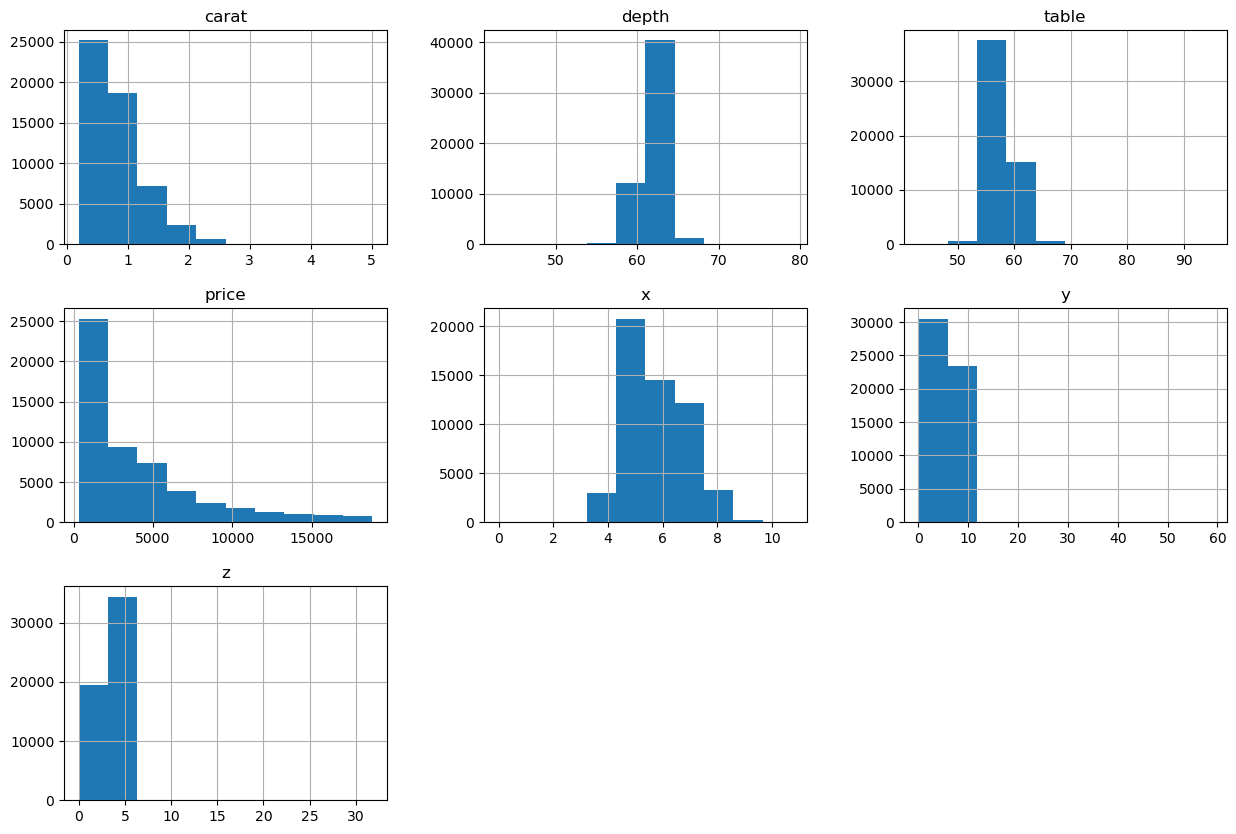

In [7]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
diamond.hist(ax = ax, bins = 10)
plt.show()


<AxesSubplot:xlabel='cut', ylabel='price'>

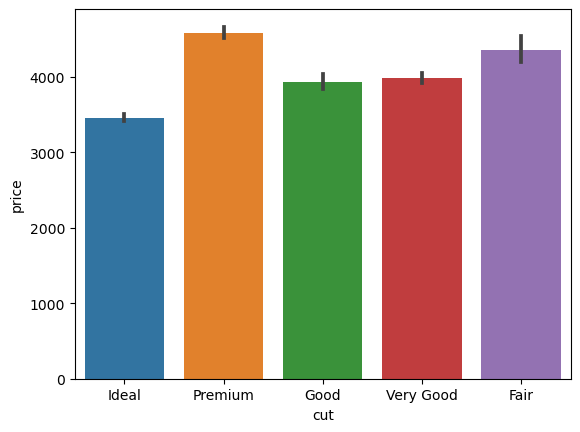

In [8]:
sns.barplot(x = "cut", y = "price", data = diamond)

<AxesSubplot:xlabel='clarity', ylabel='price'>

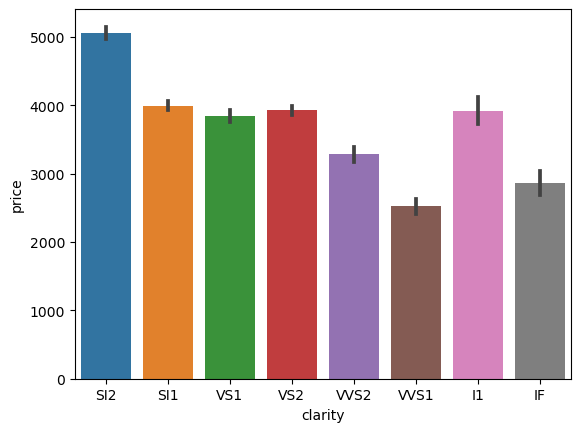

In [9]:
sns.barplot(x = "clarity", y = "price", data = diamond)

<AxesSubplot:xlabel='carat', ylabel='price'>

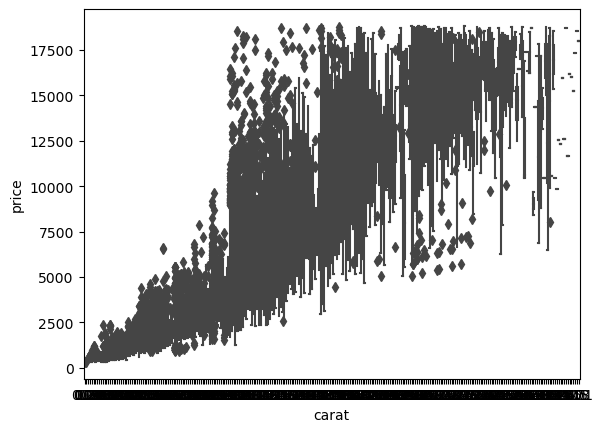

In [10]:
sns.boxplot(x = "carat", y = "price", data = diamond)

<AxesSubplot:xlabel='color', ylabel='price'>

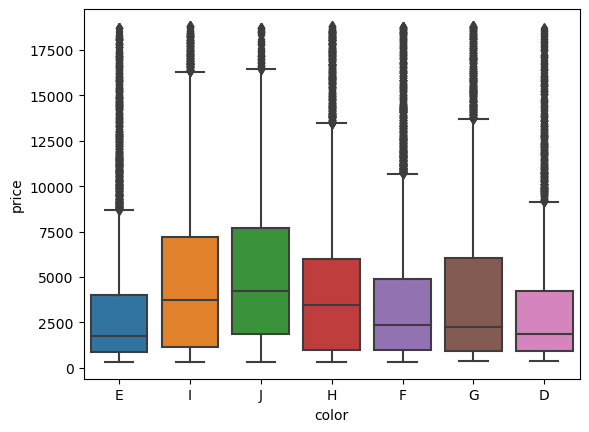

In [11]:
sns.boxplot(x = "color", y = "price", data = diamond)

In [12]:
diamond['cut'] = diamond['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})
diamond['color'] = diamond['color'].map({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7})
diamond['clarity'] = diamond['clarity'].map({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})

diamond_norm = (diamond - diamond.mean()) / diamond.std()  # normalizing non-categorical features

In [13]:
target_column = 'price'


In [14]:
# selecting target and features

X = diamond_norm.drop(target_column, axis=1).values
y = diamond_norm[target_column].values

In [15]:
# splitting into training and testing data sets

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [16]:
# Printing the shape of your X_train, y_train, X_test, y_test.

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (43152, 9)
y_train shape: (43152,)
X_test shape: (10788, 9)
y_test shape: (10788,)


In [17]:
# model fitting

model = LinearRegression()
model.fit(X_train, y_train)

[ 0.01574182  1.21958975  0.03780828  0.15158981  0.22755567 -0.02739599
 -0.01757253 -0.17961951  0.01883541 -0.01215958]


In [18]:
# predicting

y_pred = model.predict(X_test)
y_pred

array([-0.57025068, -0.57107306, -0.55901961, ..., -0.2108463 ,
       -0.28407825, -0.12730365])

In [19]:
# calculating MSE

mse = model.score(X_test, y_test)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.04


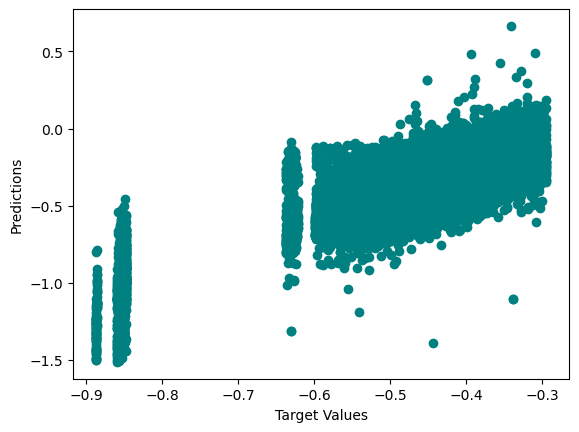

In [20]:
#Plotting the predictions vs the actual targets

plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Target Values")
plt.ylabel("Predictions")
plt.show()

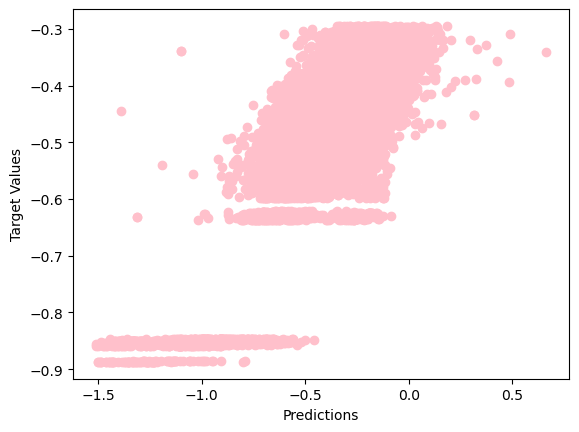

In [21]:
plt.scatter(y_pred, y_test, color='pink')
plt.xlabel("Predictions")
plt.ylabel("Target Values")
plt.show()

In [22]:
table=pd.DataFrame({'Target':y_test,'Prediction':y_pred,'Difference':y_test-y_pred})
table

,Target,Prediction,Difference
0,-0.637633,-0.570251,-0.067383
1,-0.637633,-0.571073,-0.066560
2,-0.637633,-0.559020,-0.078614
3,-0.637633,-0.625077,-0.012556
4,-0.637633,-0.744183,0.106550
...,...,...,...
10783,-0.294728,-0.041887,-0.252841
10784,-0.294728,-0.164175,-0.130553
10785,-0.294728,-0.210846,-0.083882
10786,-0.294728,-0.284078,-0.010650


In [23]:
pickle.dump(model.weights, open("/Users/navyakakandula/Desktop/MLBALASAIKRISHNAMADDULURI_NAVYAKAKANDULA_assignment1_part2.pickle", "wb"))

In [24]:
class RidgeRegression:
    def __init__(self, alpha):
        self.alpha = alpha
        
    def fit(self, X, y):
        n, p = X.shape
        
        # adding bias
        X = np.hstack([np.ones((n, 1)), X]) 
        I = np.eye(p + 1)
        I[0, 0] = 0 
        self.beta = np.linalg.inv(X.T.dot(X) + self.alpha * I).dot(X.T).dot(y)
        
    def predict(self, X):
        n, p = X.shape
        
        # adding bias
        X = np.hstack([np.ones((n, 1)), X]) 
        return X.dot(self.beta)
    
    def mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)

In [25]:
# Model Fitting with alpha=0.1

model2 = RidgeRegression(alpha=0.1)
model2.fit(X_train, y_train)

In [26]:
# Calculating MSE

mse = model2.mse(X_test, y_test)
print("MSE on test set: ", mse)

MSE on test set:  0.03549624627701463


In [27]:
#Predicting

y_pred = model2.predict(X_test)
y_pred

array([-0.57024696, -0.57107091, -0.55901826, ..., -0.21083593,
       -0.28406129, -0.12729368])

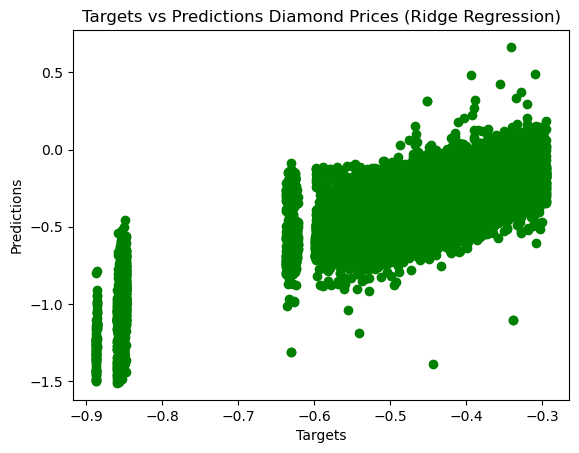

In [28]:
# Plotting the predictions over targets

plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.title('Targets vs Predictions Diamond Prices (Ridge Regression)')
plt.show()

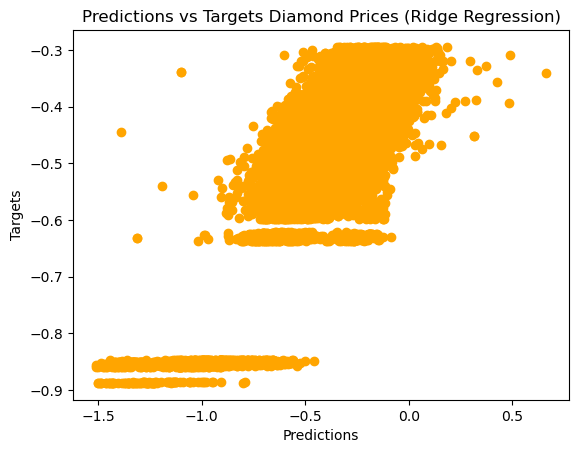

In [29]:
plt.scatter(y_pred, y_test, color='orange')
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.title('Predictions vs Targets Diamond Prices (Ridge Regression)')
plt.show()

In [30]:
pickle.dump(model2.alpha, open("/Users/navyakakandula/Desktop/MLBALASAIKRISHNAMADDULURI_NAVYAKAKANDULA_assignment1_part3.pickle", "wb"))

In [31]:
table2=pd.DataFrame({'Target':y_test,'Prediction':y_pred,'Difference':y_test-y_pred})
table2

,Target,Prediction,Difference
0,-0.637633,-0.570247,-0.067386
1,-0.637633,-0.571071,-0.066562
2,-0.637633,-0.559018,-0.078615
3,-0.637633,-0.625076,-0.012558
4,-0.637633,-0.744167,0.106533
...,...,...,...
10783,-0.294728,-0.041880,-0.252848
10784,-0.294728,-0.164166,-0.130562
10785,-0.294728,-0.210836,-0.083892
10786,-0.294728,-0.284061,-0.010667
